## Regresión Elastic Net


La regresión __Elastic Net__ combina la regresión __Ridge__ y __LASSO__, ponderadas mediante el hiper-parametro __r__.
El termino de regularización de __Elastic Net__ mezcla __L2 (Ridge)__ y __L1(LASSO).

La función de coste es: 

$$
J\left ( \theta \right )= \frac{1}{n}\sum_{i=1}^{n}\left ( y^{i}-\theta ^{T}x^{i} \right )^{2}+r\alpha \sum_{i=1}^{n}|\theta_{i}|+\frac{1-r}{2}\alpha \sum_{i=1}^{n}\theta _{i}^{2}
$$

El siguiente codigo se ejecuta la regresión __Elastic Net__ en un conjunto de datos generados que contienen varios datos atipicos.

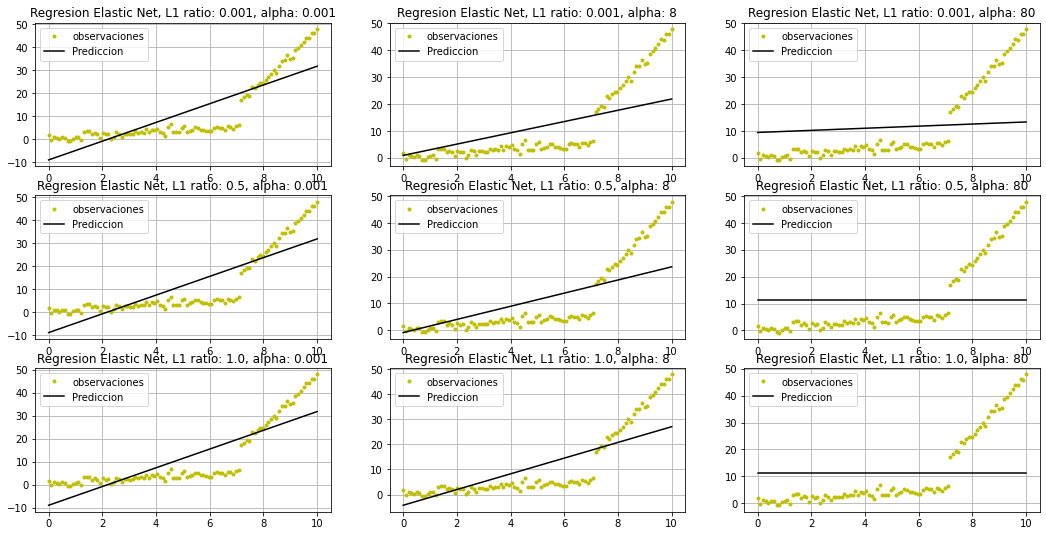

In [2]:
import numpy as np              
import matplotlib.pyplot as plt 
from sklearn.linear_model import ElasticNet

fig, axs = plt.subplots(3,3, figsize=(18,9))

def plot(data2D, target1D, predict1D, row, column, title):
    axs[row,column].plot(data2D, target1D, 'y.', markersize=6,
                         label='observaciones')
    axs[row,column].plot(data2D, predict1D, 'k-', label='Prediccion')
    axs[row,column].legend()
    axs[row,column].set_title('Regresion Elastic Net, '+title)
    axs[row,column].grid()
    return

N = 100  # numbero de obs                     
X = np.linspace(0,10,N)       
y = 0.8*X + np.random.randn(N)  
for i in range(1,30):
    y[-i]+=40-i   # insertando datos atipicos
X = np.vstack([np.zeros(N), X]).T

for l1_ratio, row in zip([0.001,0.5,1.0], [0,1,2]):
    for alpha, column in zip([0.001,8,80], [0,1,2]):
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic.fit(X, y)
        y_pred = elastic.predict(X)
        plot(X[:,1], y, y_pred, row, column, 'L1 ratio: '+str(l1_ratio)+', alpha: '+str(alpha))